In [12]:
import pandas as pd
import random
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 불러오기
user_data = pd.read_csv('./user_data.csv')
tourist_data = pd.read_csv('./sight_score.csv')

## 사용자 데이터 클러스터 시각화

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


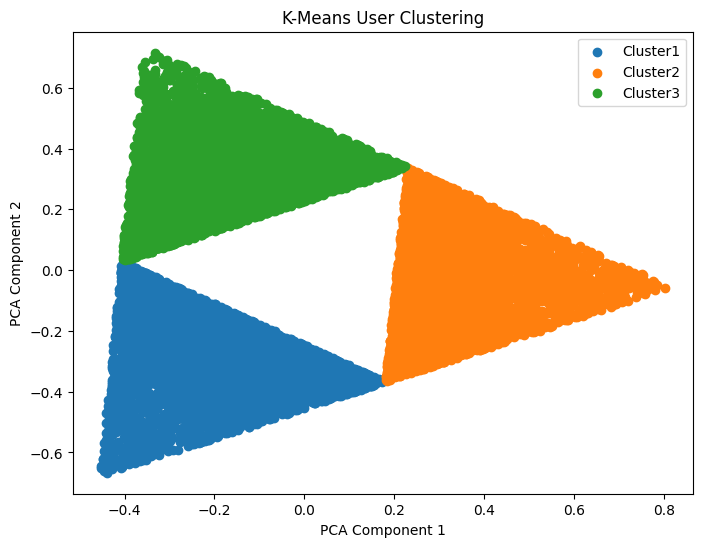

In [13]:
n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(user_data[['price_weight', 'review_weight', 'rating_weight']])

# 3차원 데이터를 2차원으로 축소
pca = PCA(n_components=2)
user_weights_2d = pca.fit_transform(user_data[['price_weight', 'review_weight', 'rating_weight']])

# 클러스터링 시각화
plt.figure(figsize = (8,6))
for cluster in range(n_clusters):
    plt.scatter(
        user_weights_2d[kmeans.labels_ == cluster, 0],
        user_weights_2d[kmeans.labels_ == cluster, 1],
        label=f'Cluster{cluster + 1}',
    )
plt.title("K-Means User Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

## 관광지 데이터 클러스터 시각화

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

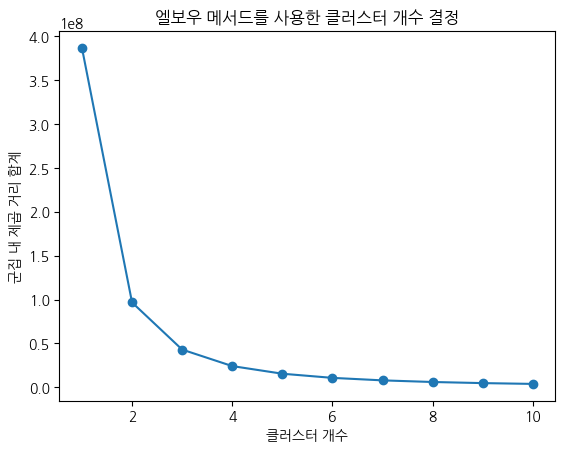

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# 클러스터 개수 범위를 설정합니다 (예: 1부터 10까지 테스트)
cluster_range = range(1, 11)
cluster_errors = []

# 각 클러스터 개수에 대한 K-평균 클러스터링 실행
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(tourist_data)
    cluster_errors.append(kmeans.inertia_)

plt.rcParams["font.family"] = "NanumGothic"    
    
# 군집 내 제곱 거리 합계 그래프 그리기
plt.plot(cluster_range, cluster_errors, marker='o')
plt.xlabel('클러스터 개수')
plt.ylabel('군집 내 제곱 거리 합계')
plt.title('엘보우 메서드를 사용한 클러스터 개수 결정')
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


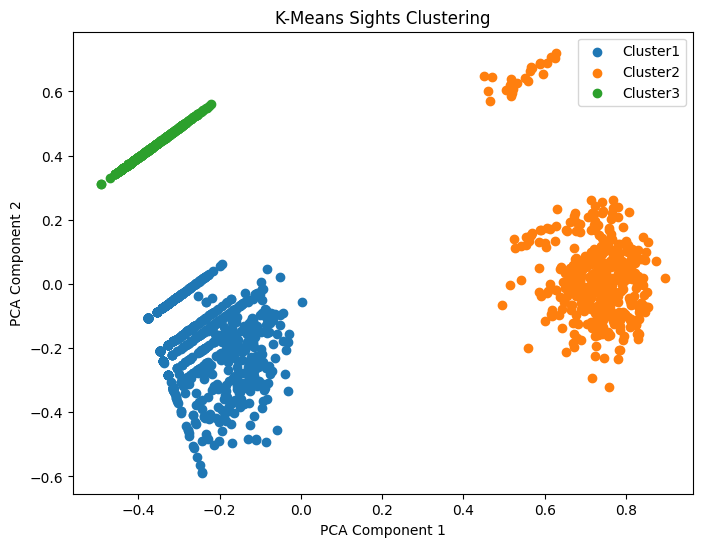

In [14]:
n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(tourist_data[['price_score', 'review_score', 'rating_score']])

# 3차원 데이터를 2차원으로 축소
pca = PCA(n_components=2)
user_weights_2d = pca.fit_transform(tourist_data[['price_score', 'review_score', 'rating_score']])

# 클러스터링 시각화
plt.figure(figsize = (8,6))
for cluster in range(n_clusters):
    plt.scatter(
        user_weights_2d[kmeans.labels_ == cluster, 0],
        user_weights_2d[kmeans.labels_ == cluster, 1],
        label=f'Cluster{cluster + 1}',
    )
plt.title("K-Means Sights Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()